# Notebook Iteracion 2 Modelado

### Objetivo:
Realizar un tratamiento completo a los datos de entrenamiento y ejecutar de nuevo el modelo línea base para observar mejorías en las métricas:
- Análisis de distribucion y atípicos sobre la variables predictoras
- Análisis de correlaciones variable precio vs variables predictoras
- Análisis de correlaciones entre variables predictoras
- Nueva ejecución del modelo línea base 

In [1]:
# Funciones generales
import sys
sys.path.append('../')
# A medida que avanzan las iteraciones se crearan mas funcinoes transversales
from funciones import *

**Lectura de datos**
Se leen los datos resultantes de la iteración 1 aprovechando el tratamiento realizado a estos datos

In [11]:
import os 
# get current directory
path = os.getcwd()
# parent directory
path = os.path.abspath("../")
data_model = pd.read_csv(path + "/iteracion_1/base_modelado_sin_out_precios.csv")
data_model.head()

precio    zona  barrio_sector  baños_familiares  area_bruta   
0  1100000.0  centro       castilla               1.0        95.0  \
1   950000.0  centro    el salvador               1.0        70.0   
2   970000.0  centro    los angeles               1.0        38.0   
3  1400000.0  centro          prado               1.0        50.0   
4   800000.0  centro  12 de octubre               1.0        92.0   

   numero_niveles  parqueaderos  alcobas_familiares  estrato  area_total  ...   
0             1.0           0.0                 3.0      0.0        95.0  ...  \
1             1.0           0.0                 2.0      3.0        70.0  ...   
2             1.0           0.0                 1.0      4.0        38.0  ...   
3             1.0           1.0                 2.0      0.0        50.0  ...   
4             1.0           0.0                 3.0      2.0        92.0  ...   

   closet_de_linos  biblioteca  parqueadero_visitantes  gimnasio  piscina   
0              1.0         1.0                     0.0       0.0      0.0  \
1              0.0         0.0                     0.0       0.0      0.0   
2              1.0         0.0                     0.0       0.0      0.0   
3              1.0         1.0                     1.0       0.0      0.0   
4              0.0         0.0                     0.0       0.0      0.0   

   salon_social  dispositivos_automatizacion  alarma  tipo_cocina_freq   
0           0.0                          0.0     0.0          0.861534  \
1           0.0                          0.0     0.0          0.081652   
2           0.0                          0.0     0.0          0.081652   
3           0.0                          0.0     0.0          0.861534   
4           0.0                          0.0     0.0          0.861534   

   tipo_pisos_freq  
0         0.596709  
1         0.596709  
2         0.596709  
3         0.596709  
4         0.596709  

[5 rows x 39 columns]

**Distribución de variable precios**

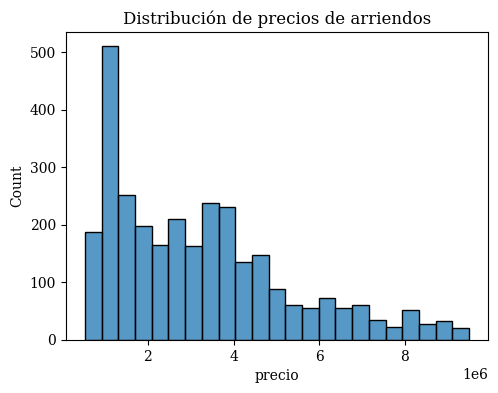

In [12]:
graficar_distribucion_histograma(data_model, 'precio')

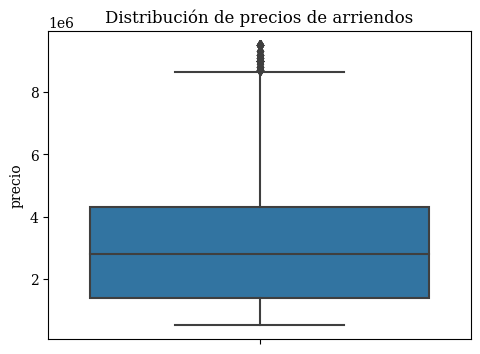

In [13]:
graficar_distribucion_boxplot(data_model, 'precio')

Dimensiones de la base

In [14]:
imprimir_dimensiones(data_model)

Numero de muestras: 3017, Número de columnas: 39


**Separación de las variables**

Las variables obtenidas por el proceso de scraping se dividen en tres tipos que es importante separar para hacer un analisis mas detallado, estas son:
- Variables categóricas: Variables booleana que indican si un inmueble cuenta con una característica
- Variables categoricas numéricas: Variables discretas numéricas
- Variables numéricas: Variables continuas

In [15]:
# Variables preductoras generales
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]

# Variables categóricas
cat_features = ['juegos_infantiles','balcon','zona_ropas','camaras_cctv','cancha_polideportiva',
                'ascensor','cancha_squash','zona_bbq','patio','unidad_cerrada_conjunto',
                'zonas_verdes',
                'aire_acondicionado','jacuzzi','red_de_Gas','turco','porteria_24_7','sauna',
                'calentador_de_agua','terraza','closet_de_linos','biblioteca',
                'parqueadero_visitantes',
                'gimnasio','piscina','salon_social','dispositivos_automatizacion','alarma']

# Variables categíricas numéricas
cat_number_fetures = ['baños_familiares', 'numero_niveles', 'parqueaderos', 'alcobas_familiares', 'estrato']

# Variables numéricas
num_features = ['area_bruta', 'area_total','tipo_cocina_freq','tipo_pisos_freq']

**Distribución de los datos**:

se procede a realizar un análisis de distribución de los datos para observar su comportamiento y posibles tendencias en su influencia sobre el modelo

**Vriables numéricas**

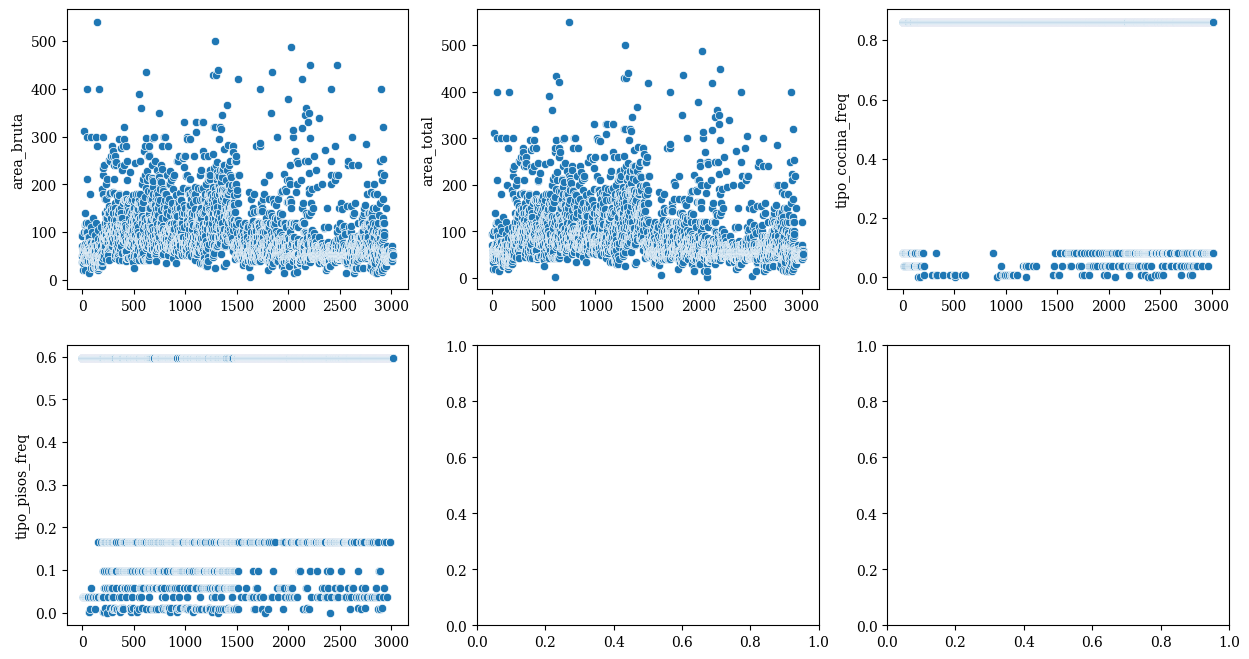

In [16]:
graficar_distribcion_vv(data_model, num_features, "dist")

En las gráficas de distribuciones de las variables numéricas no se observa comportamientos artípicos, recordando que las nuevas variables numéricas tipo_pisos_freq y tipo_cocina_freq son el resultado de aplicar encoding por frecuencias sobre las variables categóricas tipo_pisos y tipo_cocina respectivamente, donde allí se observaba una predominancia de una de las categorías sobre las demás, lo cual se traduce en el comporamiento observado de una gran cantidad de datos concentrados en una de las frecuencias. La intervencion a estas dos variables se completará con el análisis de correlaciones

**Variables categóricas numéricas**

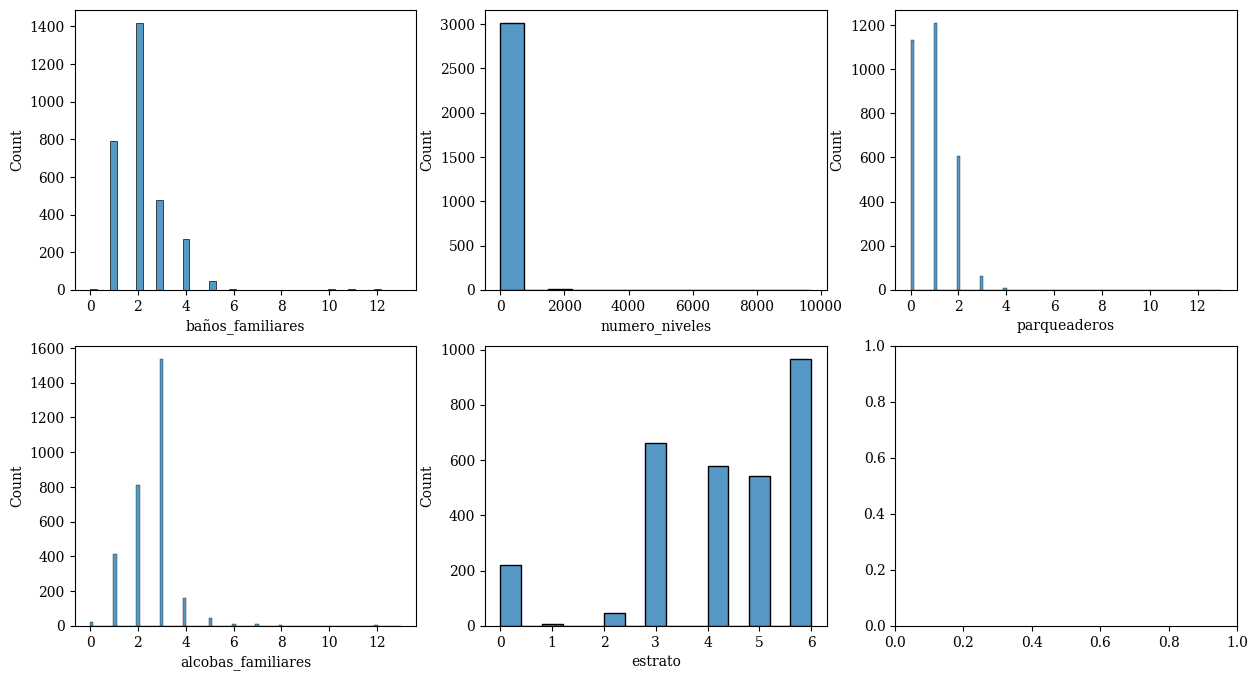

In [17]:
graficar_distribcion_vv(data_model, cat_number_fetures)

En las distrubuciones de las variables categóricas numéricas se puede observar algunos comportamientos atípicos considerando que la cobertura sobre este proyecto es de arriendo de viviendas. Estos datos son por ejemplo:
- Valores de la variable numero_niveles en miles
- Valores en numero_parqueadresos superiores a 5
- Valores de alcobas_familiares superiores a 4 

Para observar estos comportamientos atípicos se calcula el porcentaje de información que representa cada categoría en cada variable para así realizar intervenciones

In [18]:
for cat in cat_number_fetures:
    print((data_model.groupby(cat).size()/data_model.shape[0])*100)
    print('\n')

baños_familiares
0.0      0.165728
1.0     26.151806
2.0     46.967186
3.0     15.777262
4.0      8.982433
5.0      1.557839
6.0      0.132582
7.0      0.033146
10.0     0.066291
11.0     0.066291
12.0     0.066291
13.0     0.033146
dtype: float64


numero_niveles
0.0        0.033146
1.0       92.807425
2.0        3.712297
3.0        0.928074
4.0        0.397746
5.0        0.165728
6.0        0.099437
7.0        0.198873
8.0        0.132582
9.0        0.099437
11.0       0.066291
12.0       0.066291
13.0       0.066291
14.0       0.033146
15.0       0.099437
16.0       0.066291
18.0       0.033146
19.0       0.066291
20.0       0.066291
21.0       0.033146
22.0       0.066291
23.0       0.033146
24.0       0.066291
25.0       0.033146
26.0       0.033146
141.0      0.033146
201.0      0.033146
301.0      0.033146
302.0      0.066291
402.0      0.033146
404.0      0.033146
447.0      0.033146
501.0      0.033146
710.0      0.033146
805.0      0.033146
1011.0     0.033146
1706.0     0.03

Se observa que las categorías atípicas no representan, en la mayoría de las ocaciones, ni un 1% de los datos, por tanto se eliminarán estas categorías que indican valores ilógicos en estas variables. Los limites elegidos para estos valores se eligen de acuerdo a criterio del desarrollador y el negocio

In [19]:
data_model_no_out = data_model[data_model['numero_niveles'] <= 3]
data_model_no_out = data_model_no_out[data_model_no_out['baños_familiares'] <= 5]
data_model_no_out = data_model_no_out[data_model_no_out['parqueaderos'] <= 3]
data_model_no_out = data_model_no_out[data_model_no_out['alcobas_familiares'] <= 5]
data_model_no_out = data_model_no_out[data_model_no_out['alcobas_familiares'] <= 5]
imprimir_dimensiones(data_model_no_out)

Numero de muestras: 2890, Número de columnas: 39


Con la eliminacion de los datos atípicos se observa la nueva distribución de las variables categóricas numéricas


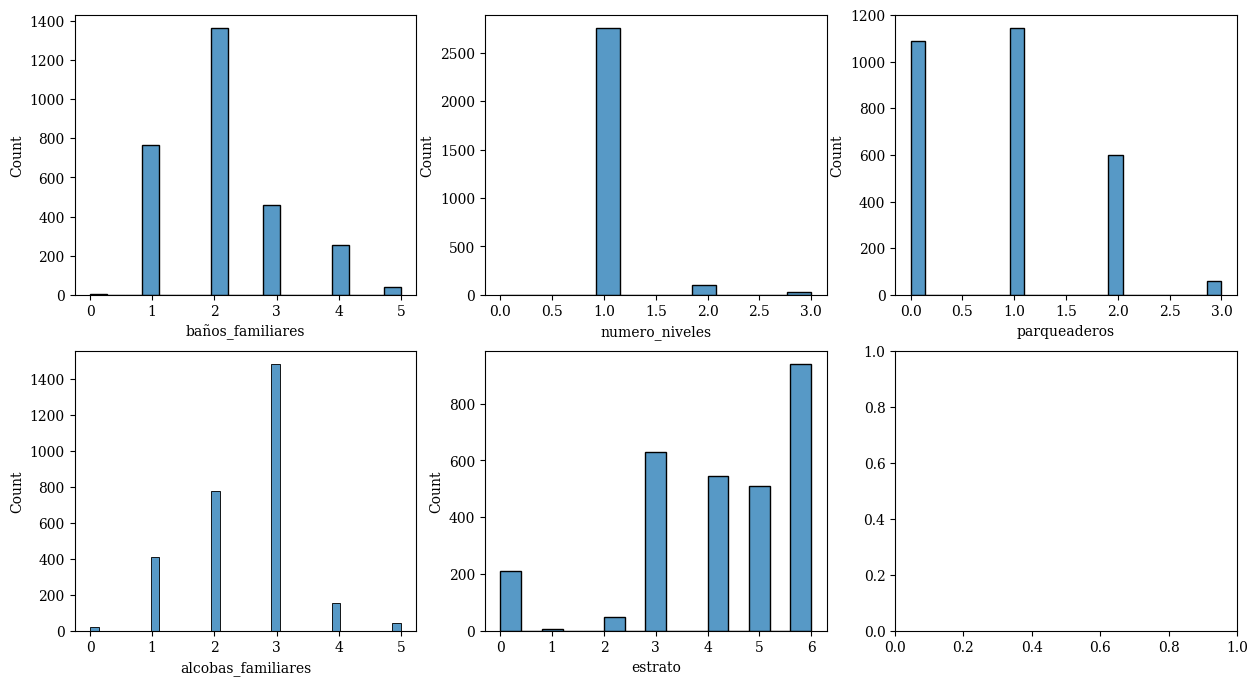

In [21]:
graficar_distribcion_vv(data_model_no_out, cat_number_fetures)

**Variables categóricas numéricas**

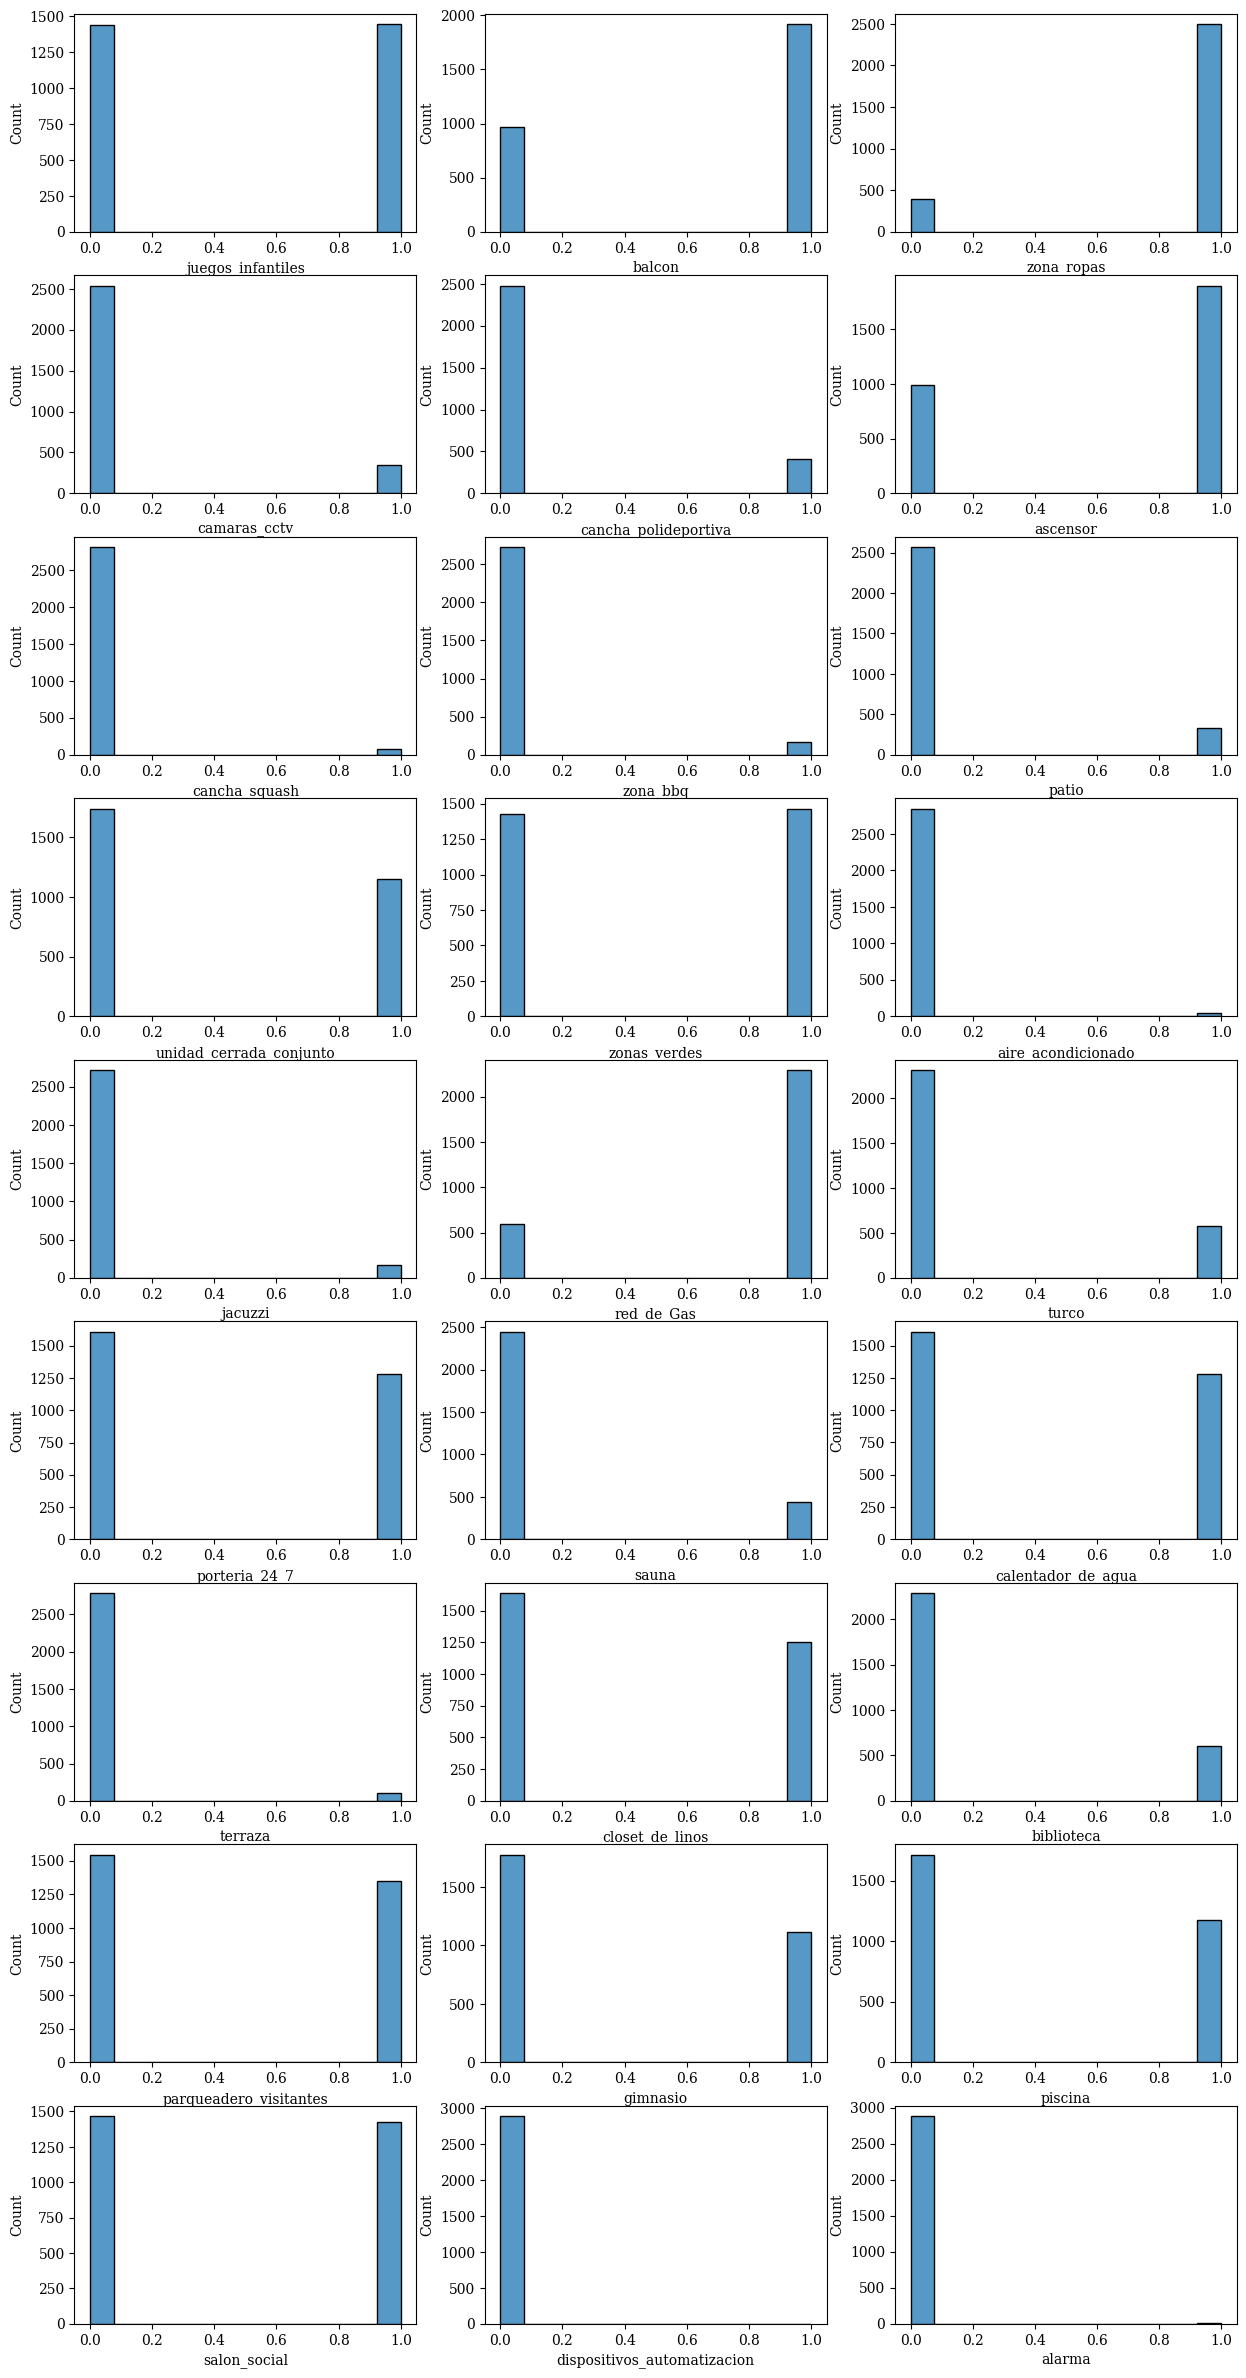

In [22]:
graficar_distribcion_vv(data_model_no_out, cat_features, fig_zise=(15,30), num_rows=9)

En las variables categóricas tenemos valores booleanos que representan si una vivienda cuenta con una caraterística o no, aquí es importante resaltar que si la mayoría de las vivientas cuentan con una característica esta variable tomará el valor de 1 en un porcentaje muy superior a 0, lo cual indica que esta no tendra ninguna afectación en el modelo por su falta de variablilidad

Esto se complementa calculando el porcentaje de datos que representa cada categoría

In [23]:
for cat in cat_features:
    print((data_model_no_out.groupby(cat).size()/data_model_no_out.shape[0])*100)
    print('\n')

juegos_infantiles
0.0    49.965398
1.0    50.034602
dtype: float64


balcon
0.0    33.633218
1.0    66.366782
dtype: float64


zona_ropas
0.0    13.633218
1.0    86.366782
dtype: float64


camaras_cctv
0.0    87.854671
1.0    12.145329
dtype: float64


cancha_polideportiva
0.0    85.743945
1.0    14.256055
dtype: float64


ascensor
0.0    34.256055
1.0    65.743945
dtype: float64


cancha_squash
0.0    97.16263
1.0     2.83737
dtype: float64


zona_bbq
0.0    94.221453
1.0     5.778547
dtype: float64


patio
0.0    88.754325
1.0    11.245675
dtype: float64


unidad_cerrada_conjunto
0.0    60.138408
1.0    39.861592
dtype: float64


zonas_verdes
0.0    49.307958
1.0    50.692042
dtype: float64


aire_acondicionado
0.0    98.477509
1.0     1.522491
dtype: float64


jacuzzi
0.0    93.979239
1.0     6.020761
dtype: float64


red_de_Gas
0.0    20.657439
1.0    79.342561
dtype: float64


turco
0.0    80.069204
1.0    19.930796
dtype: float64


porteria_24_7
0.0    55.67474
1.0    44.32526
dt

Se observa que variables como _cancha_squash_, _zona_bbq_ o _patio_, cuentan con un sesgo muy grande entre categorías, lo cual puede implicar que no sean influyentes en el modelo. Sin embargo, la eliminación de variables con este comportamiento se determinará completando este analisis con correlaciones

**Correlación**

El analisis de correlación se procede mediante las siguientes ejecuciones:
- Método spearman para el cálculo de correlaciones
- Estandarización de las variables predictoras

In [24]:
# Separación de las variables predictoras y la variable respuesta
X = data_model_no_out[pred_columns]
Y = data_model_no_out['precio']

In [25]:
X_est = estandarizar(X)

## Correlación

### Correlación entre variables predictoras y variable salida

In [219]:
spearman = []
valor_p = []
for col in x_sclarer:
    s_valor, p_valor = spearmanr(x_sclarer[col], y_no_out)
    spearman.append(s_valor)
    valor_p.append(p_valor)

In [220]:
spearman = [abs(i) for i in spearman]

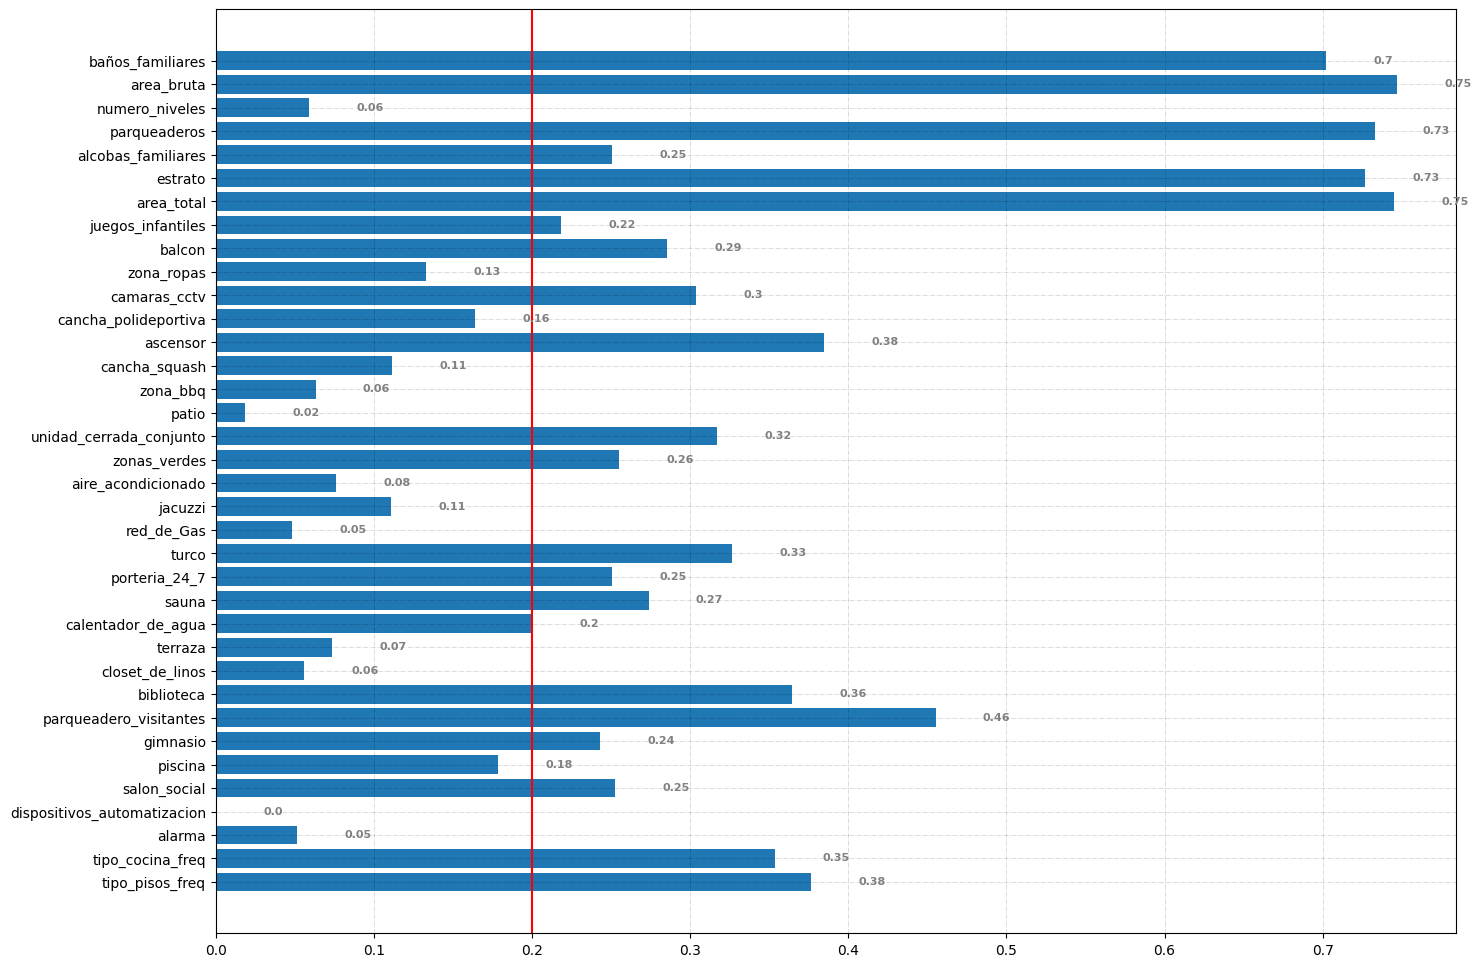

In [221]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
# Horizontal Bar Plot
ax.barh(x_sclarer.columns, spearman)

# Add x, y gridlines
ax.grid( color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.03, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')


plt.axvline(0.2,0,1,label='correlation limit',c='red')
# Show Plot
plt.show()

In [222]:
# Variables a descartar} por correlación con variable final
columns_disc_corr = [
    "numero_niveles",
    "cancha_squash",
    "aire_acondicionado",
    "jacuzzi",
    "terraza",
    "dispositivos_automatizacion",
    "alarma",
    "red_de_Gas",
    "zona_ropas",
    "cancha_polideportiva",
    "zona_bbq",
    "patio"
]

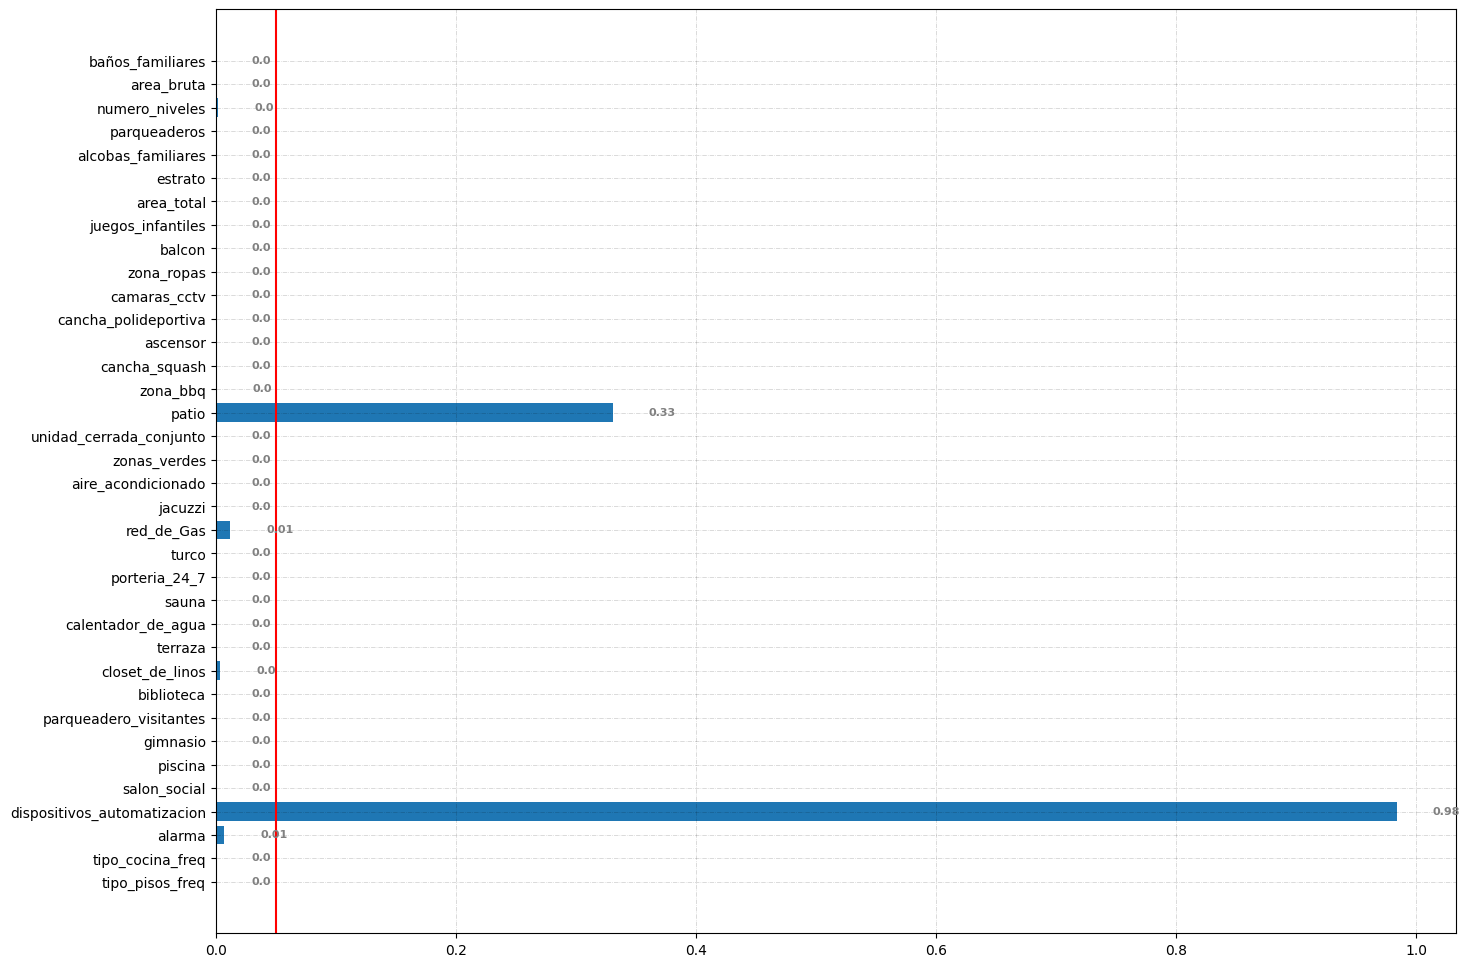

In [223]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
# Horizontal Bar Plot
ax.barh(x_sclarer.columns, valor_p)

# Add x, y gridlines
ax.grid( color ='black',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.03, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 8, fontweight ='bold',
             color ='grey')


plt.axvline(0.05,0,1,label='correlation limit',c='red')
# Show Plot
plt.show()

### Correlación entre variables predictoras

In [224]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer.values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

In [225]:
corr = 0
columns = list(x_sclarer.columns)
for i in columns:
    for j in columns:
        if spearman_num[corr] >= 0.7 and i != j:
            print("{} vs {}: {}".format(i, j, spearman_num[corr]))
        corr += 1

baños_familiares vs area_bruta: 0.774596839284559
baños_familiares vs area_total: 0.772171911220186
area_bruta vs baños_familiares: 0.7745968392845589
area_bruta vs area_total: 0.9977924165867139
area_total vs baños_familiares: 0.772171911220186
area_total vs area_bruta: 0.9977924165867139
juegos_infantiles vs zonas_verdes: 0.7178837932100675
juegos_infantiles vs salon_social: 0.7295516077123261
unidad_cerrada_conjunto vs porteria_24_7: 0.8099172713758526
zonas_verdes vs juegos_infantiles: 0.7178837932100675
porteria_24_7 vs unidad_cerrada_conjunto: 0.8099172713758525
salon_social vs juegos_infantiles: 0.7295516077123261


#### Correlación Numéricas

In [226]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[num_features].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

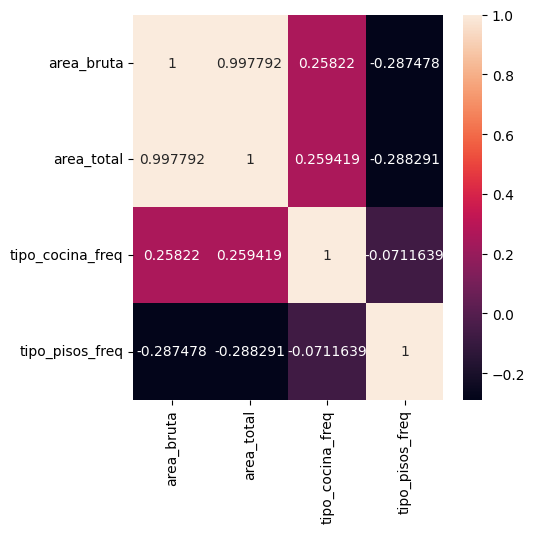

In [227]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(5,5))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = num_features, yticklabels = num_features)
plt.show()

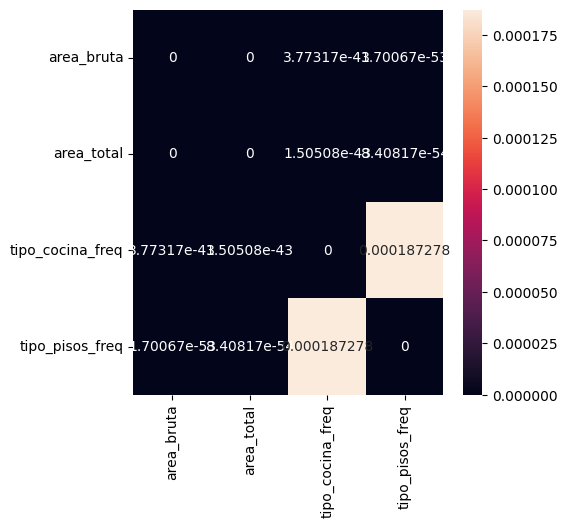

In [228]:
plt.figure(figsize=(5,5))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = num_features, yticklabels = num_features)
plt.show()

Variables altamente correlacionadas:

- area_total - area_bruta: Valor de correlación alto y valor de p significativo

In [229]:
columns_disc_corr.append("area_total")

#### Correlación Numéricas Categóricas

In [230]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[cat_number_fetures].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

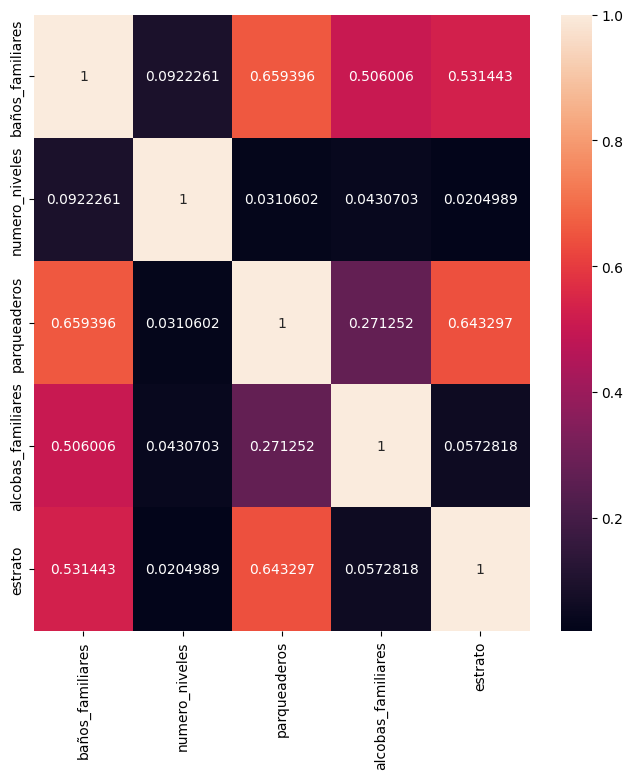

In [231]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(8,8))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = cat_number_fetures, yticklabels = cat_number_fetures)
plt.show()

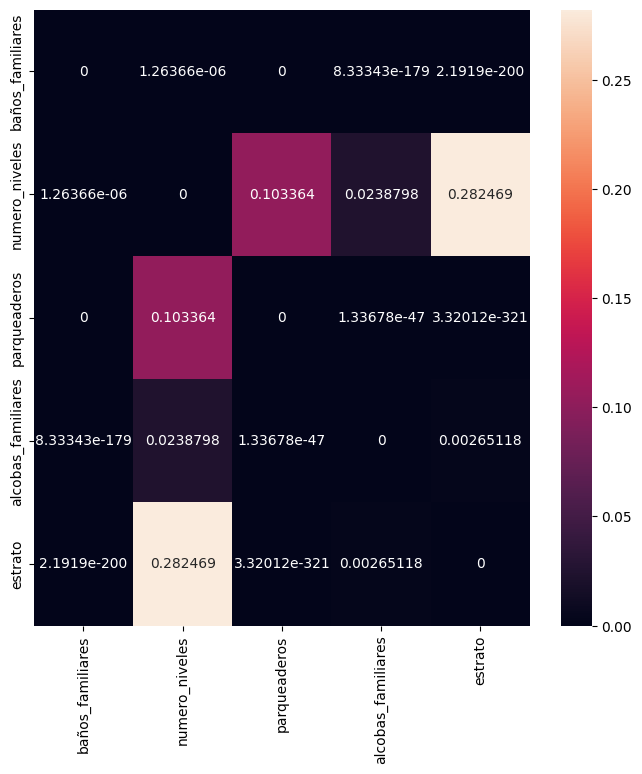

In [232]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = cat_number_fetures, yticklabels = cat_number_fetures)
plt.show()

NO se optiene variables altamente correlacionadas, sin embargo queda pendiente explorar métodos de correlación de variables categóricas

#### Correlación categoricas

In [233]:
spearman_num = []
valor_p_num = []
data_num = x_sclarer[cat_features].values
data_num = np.asanyarray(data_num)

for _,n in enumerate(np.arange(0,data_num.shape[1])):
  for _,m in enumerate(np.arange(0,data_num.shape[1])):  
      s_valor, p_valor = spearmanr(data_num[:,n], data_num[:,m])
      spearman_num.append(s_valor)
      valor_p_num.append(p_valor)

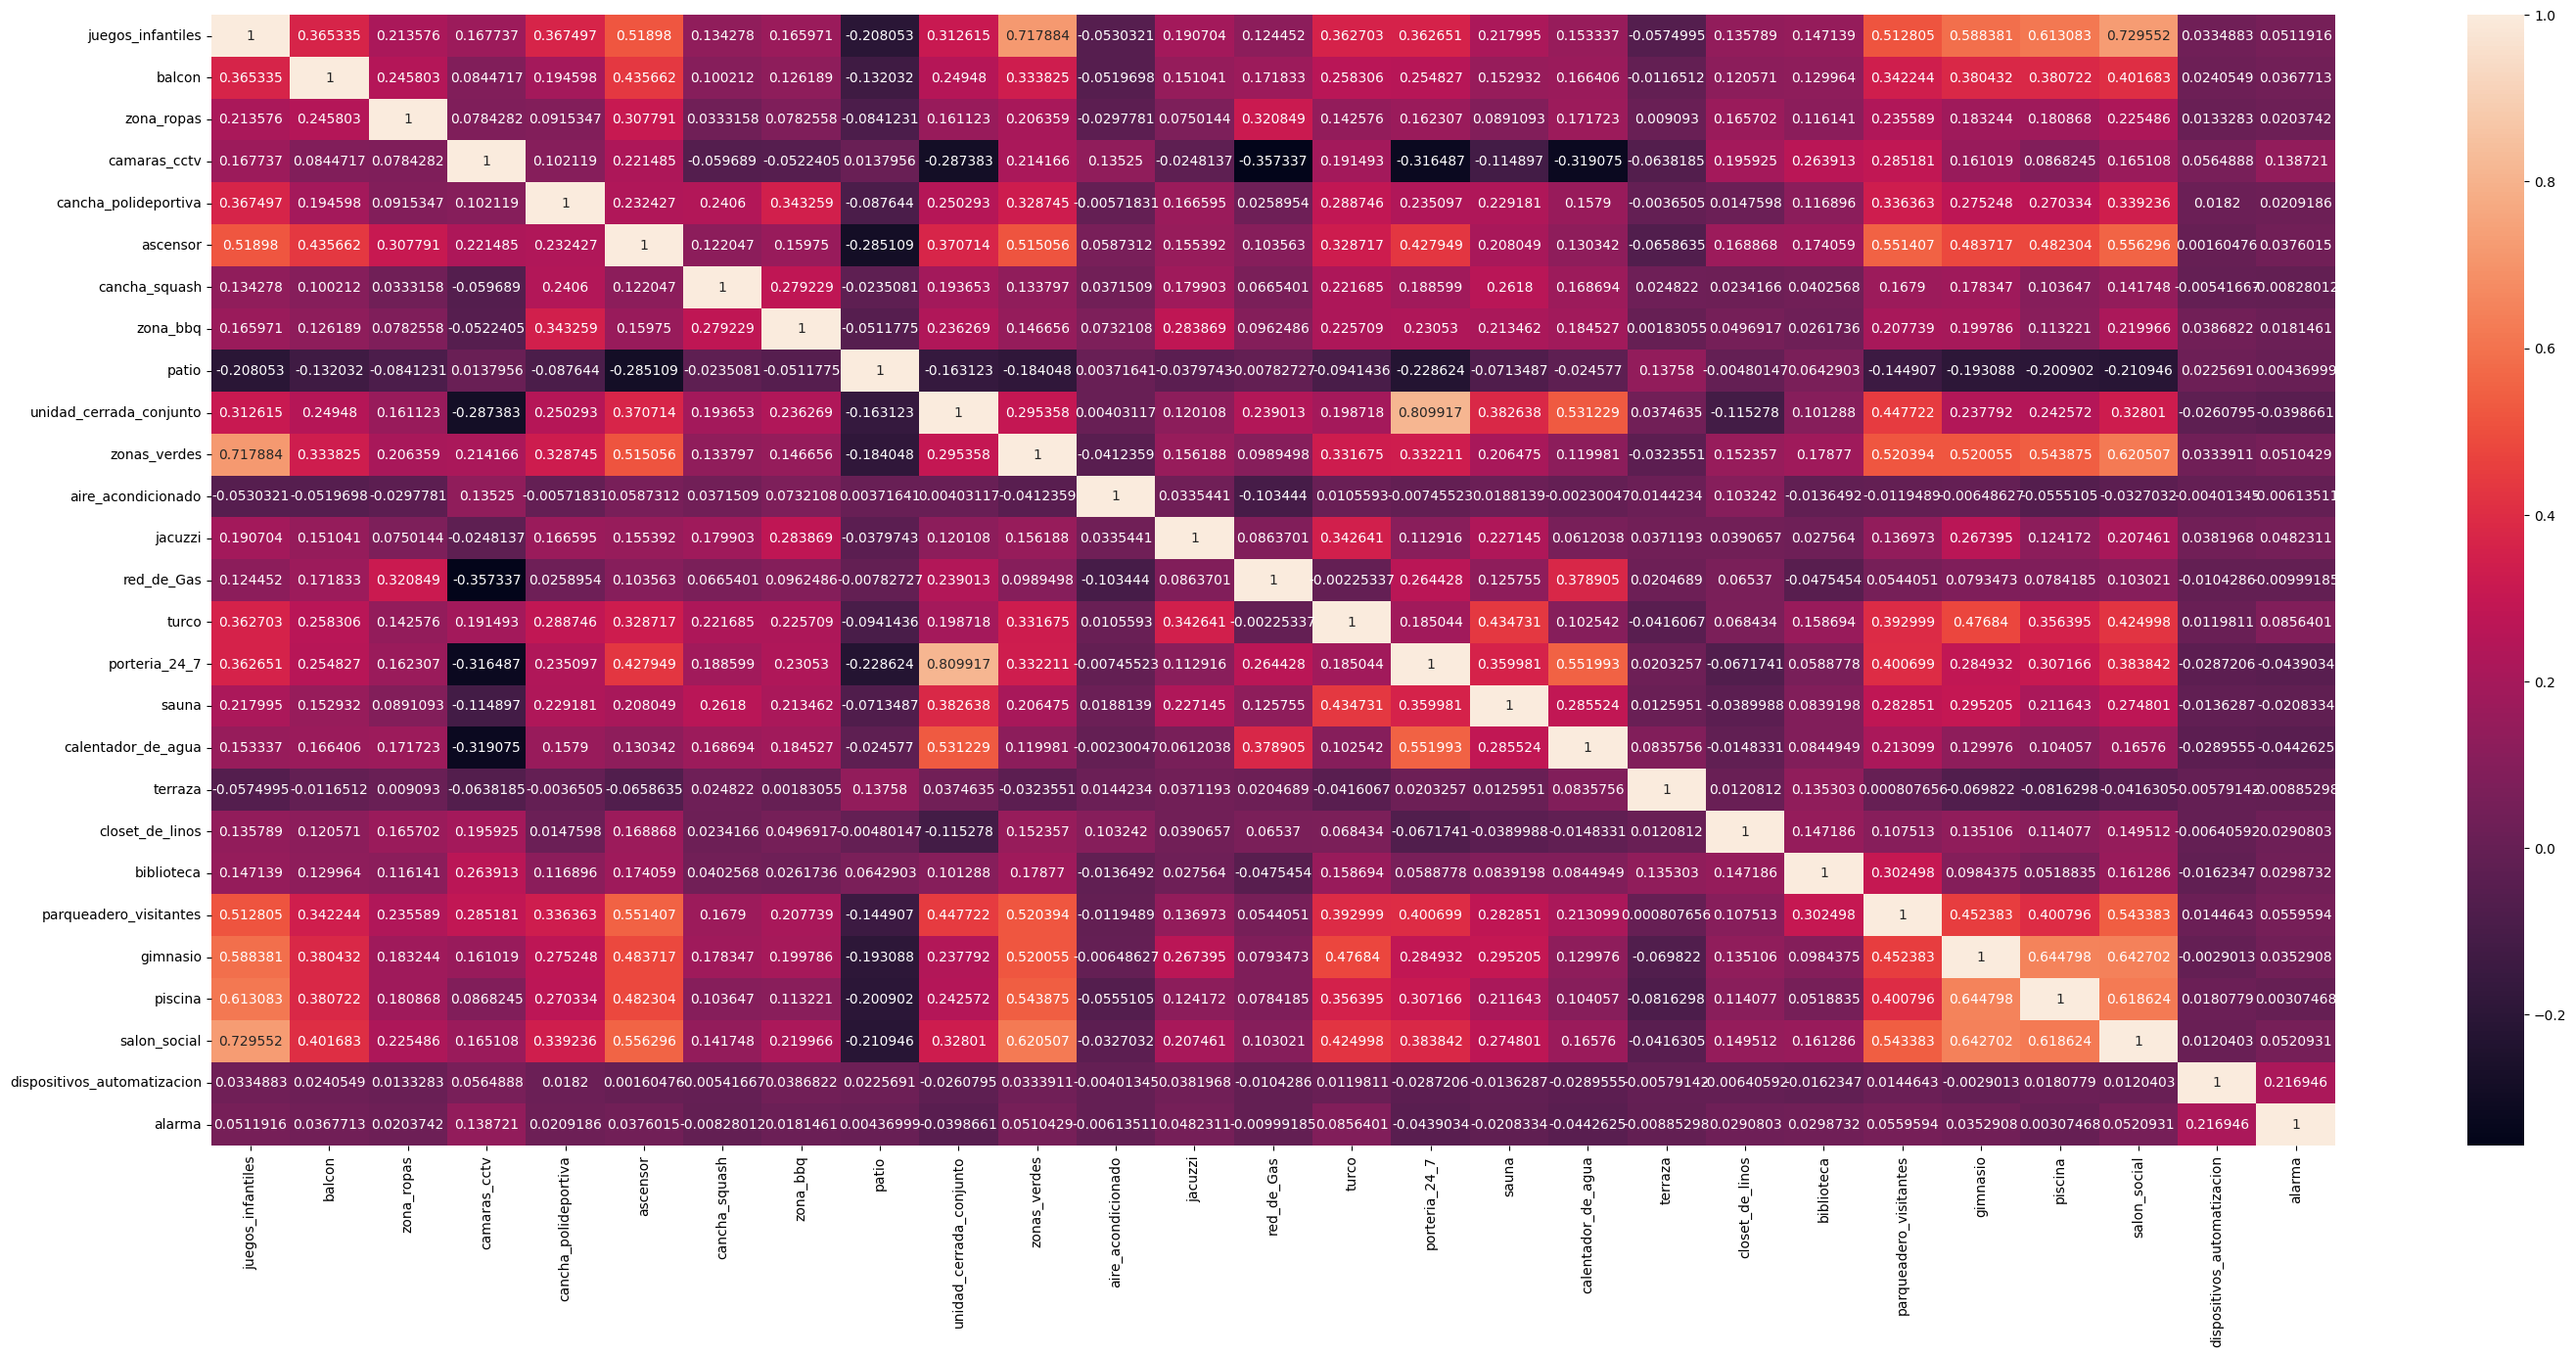

In [234]:
spearman_num = np.asarray(spearman_num)
valor_p_num = np.asarray(valor_p_num)

spearman_r = spearman_num.reshape(data_num.shape[1],data_num.shape[1])
p_value = valor_p_num.reshape(data_num.shape[1],data_num.shape[1])

plt.figure(figsize=(35,15))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = cat_features, yticklabels = cat_features)
plt.show()

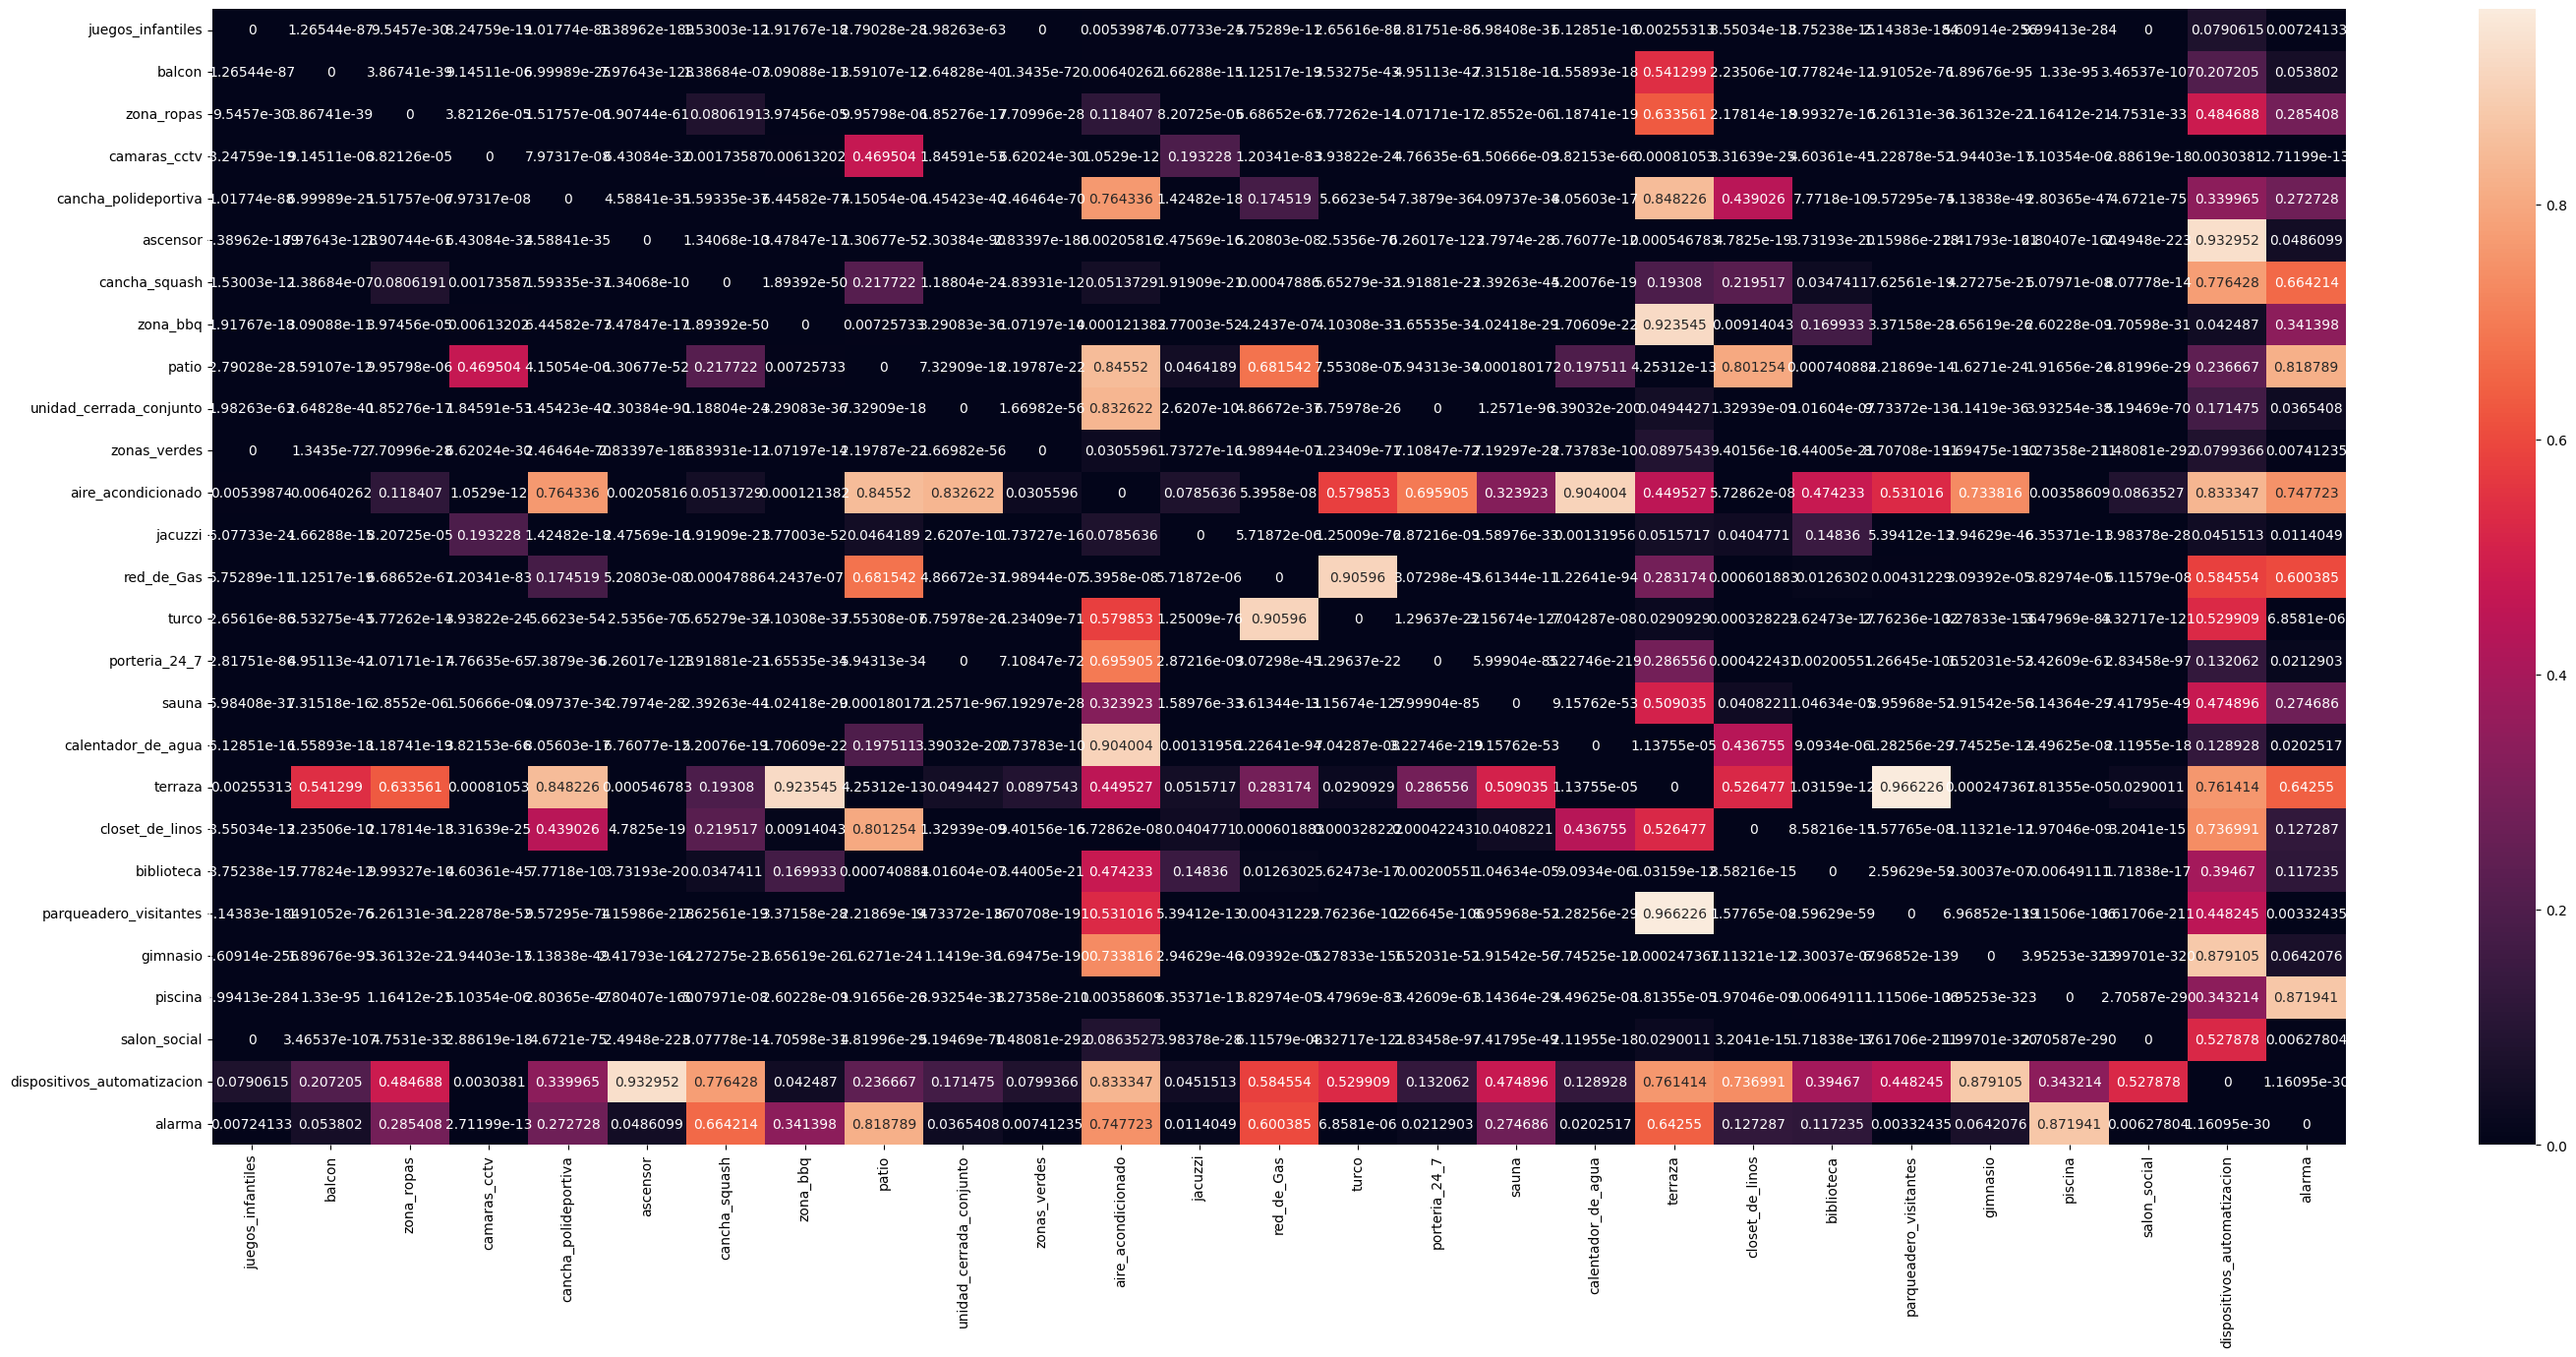

In [235]:
plt.figure(figsize=(35,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = cat_features, yticklabels = cat_features)
plt.show()

Correlacion entre variables:
- zonas_verdes - juegos_infantiles
- juegos_infantiles - salon social
- unidad_cerrada_conjunto - porteria_24_7

In [236]:
columns_disc_corr.append("porteria_24_7")

#### Correlación Categóricas

## División de los datos

In [237]:
columns_disc_corr

['numero_niveles',
 'cancha_squash',
 'aire_acondicionado',
 'jacuzzi',
 'terraza',
 'dispositivos_automatizacion',
 'alarma',
 'red_de_Gas',
 'zona_ropas',
 'cancha_polideportiva',
 'zona_bbq',
 'patio',
 'area_total',
 'porteria_24_7']

In [238]:
x_model = x_sclarer.drop(columns = columns_disc_corr)
y_model = y_no_out
x_model.shape, y_model.shape

((2751, 22), (2751, 1))

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x_model, y_model, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (2063, 22)
Tamaño de los Datos de Validación =  (688, 22)
Tamaño del Vector de Clases de Entrenamiento =  (2063, 1)
Tamaño del Vector de Clases de Prueba =  (688, 1)


# Modelo

In [240]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Importancia de variables

In [241]:
importancia = lr.coef_
importancia = pd.DataFrame(importancia[0], index=x_model.columns, columns = ['precio'])
importancia_ordenada = importancia.sort_values(by = ['precio'], ascending=False)
display(importancia_ordenada)

precio
area_bruta               7.489579e+06
baños_familiares         1.319669e+06
parqueaderos             1.199397e+06
estrato                  1.078225e+06
unidad_cerrada_conjunto  4.801515e+05
sauna                    3.880638e+05
tipo_cocina_freq         2.576243e+05
ascensor                 2.554972e+05
camaras_cctv             2.533165e+05
gimnasio                 1.528234e+05
calentador_de_agua       1.329967e+05
parqueadero_visitantes   9.717595e+04
biblioteca               9.383130e+04
turco                    6.656297e+04
piscina                  2.821289e+04
balcon                   6.532570e+02
closet_de_linos         -3.369793e+04
salon_social            -5.638624e+04
zonas_verdes            -1.298369e+05
juegos_infantiles       -1.820195e+05
tipo_pisos_freq         -2.351703e+05
alcobas_familiares      -1.522480e+06

Los coeficientes positivos indican que predicen una tendencia creciente y los coeficientes negativos indican que predicen una tendencia decreciente de la variable de salida del modelo.

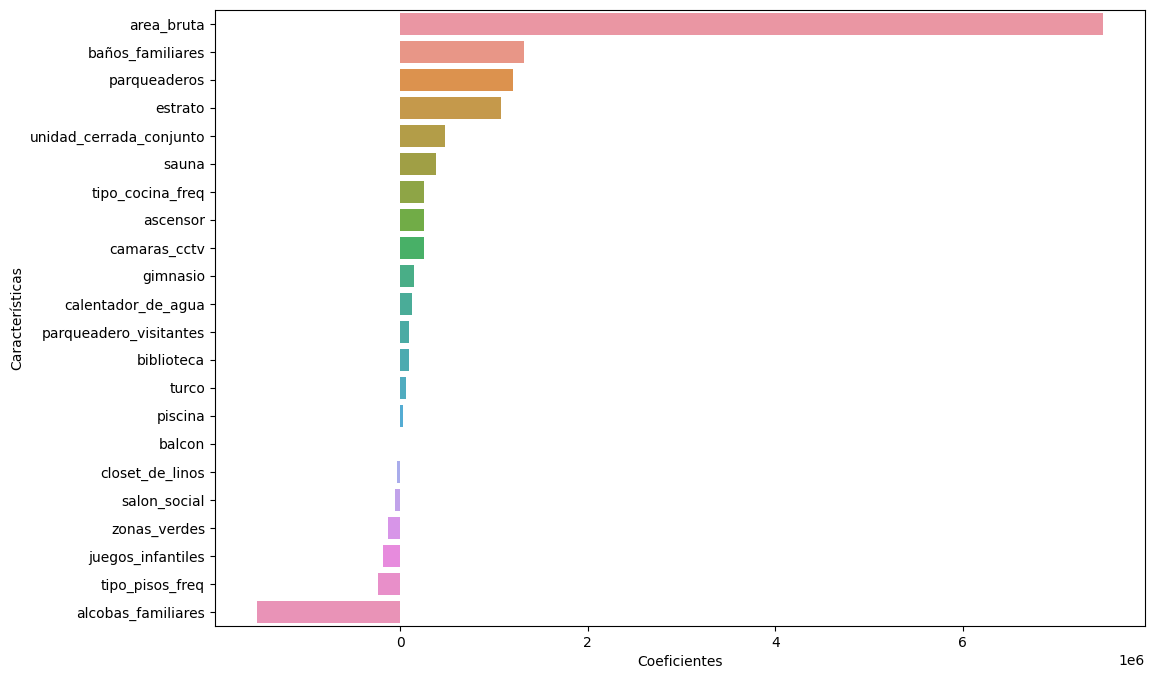

In [242]:
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(figsize=(12,8))

sns.barplot(y = importancia_ordenada.index, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

# Validación

In [243]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train #reduccion de dimensionalidad del dataset
prediccion_train = lr.predict(x_train)
residuos_train   = prediccion_train - y_train

In [244]:
import statsmodels.api as sm

C:\Users\user\AppData\Local\Temp\ipykernel_17688\54985228.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
c:\Users\user\pyEnviroments\pyscraping\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


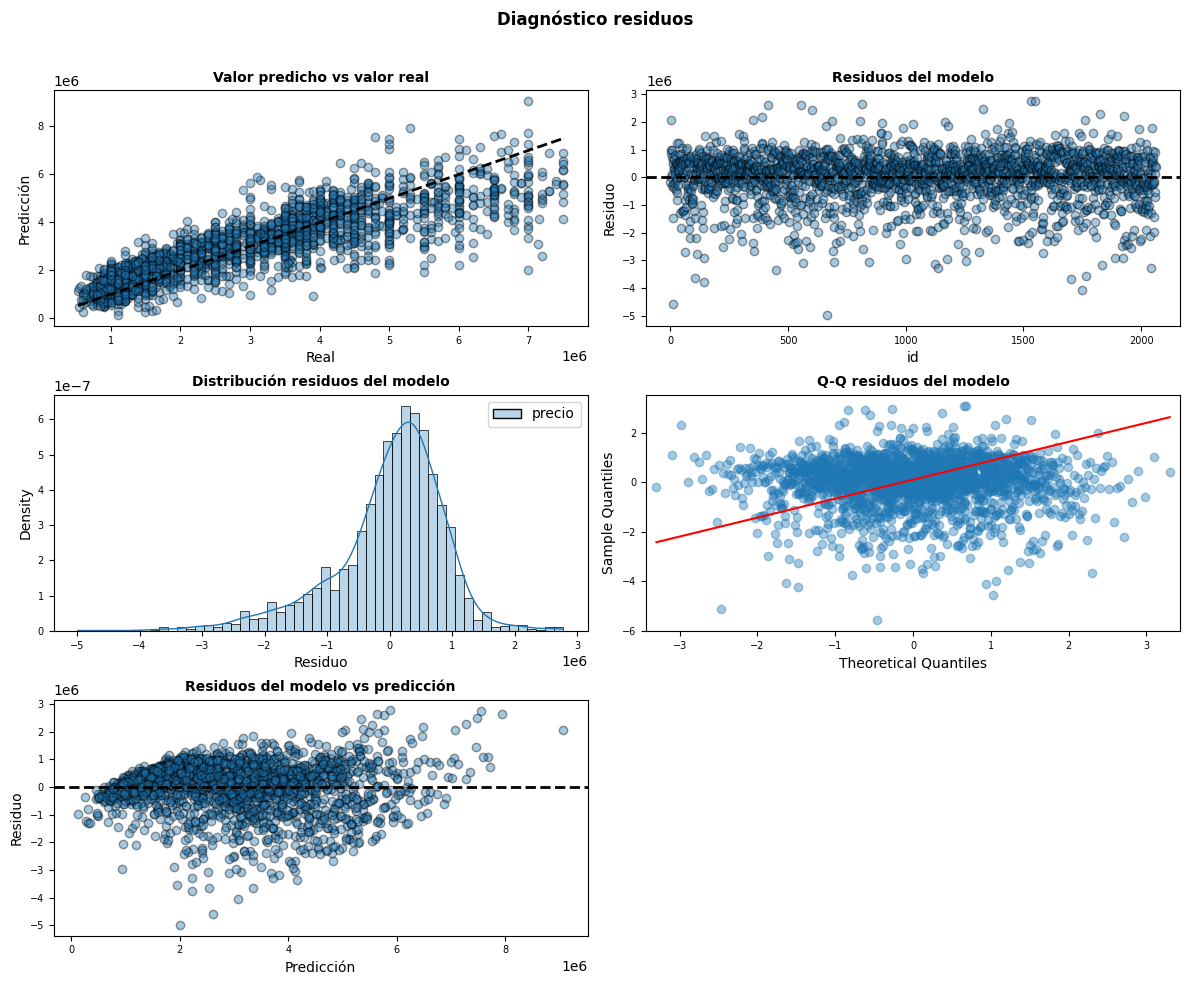

In [245]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [250]:
# Error de test del modelo 
# ==============================================================================


predicciones = lr.predict(x_test)


mse = mean_squared_error(y_true=y_test.values, y_pred=predicciones, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
MAE = mean_absolute_error(y_true=y_test, y_pred  = predicciones)
MedAE = median_absolute_error(y_true=y_test, y_pred  = predicciones)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred  = predicciones)
r2 = r2_score(y_true=y_test, y_pred=predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")
print(f"El error MAPE    de test es: {mape}")

El error MSE   de test es: 823210151015.8583
El error RMSE  de test es: 907309.291816114
El error MAE   de test es: 670737.4622678013
El error MedAE de test es: 510612.33164244436
El error R2    de test es: 0.7302124959097517
El error MAPE    de test es: 0.2757562157110327


In [247]:
Puntaje_4 = explained_variance_score(y_test, predicciones) # Se calcula la varianza Explicada
print("Varianza Explicada = {:.4f}".format(Puntaje_4))

Varianza Explicada = 0.7303


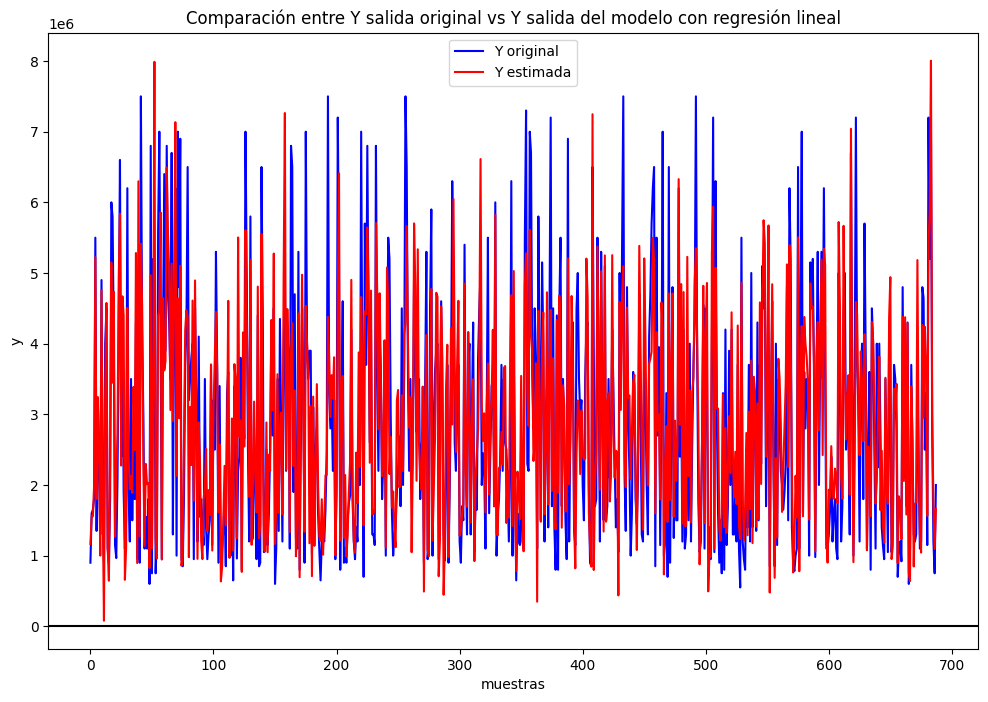

In [248]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(y_test)), y_test, color = 'blue', label='Y original') 
line_2 = plt.plot(np.arange(len(y_test)), predicciones, color = 'red', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [254]:
import statsmodels.api as sm

In [258]:
x_train

const  baños_familiares  area_bruta  parqueaderos  alcobas_familiares  \
2177    1.0               0.8    0.399625      0.000000                 1.0   
2250    1.0               0.4    0.212008      0.333333                 0.6   
1319    1.0               0.8    0.774859      1.000000                 0.6   
2712    1.0               0.4    0.069418      0.000000                 0.6   
1522    1.0               0.4    0.090056      0.333333                 0.6   
...     ...               ...         ...           ...                 ...   
1337    1.0               0.4    0.108818      0.000000                 0.8   
406     1.0               0.6    0.165103      0.666667                 0.6   
1414    1.0               0.2    0.125704      0.000000                 0.2   
2191    1.0               0.4    0.108818      0.333333                 0.6   
2671    1.0               0.2    0.048780      0.333333                 0.4   

       estrato  juegos_infantiles  balcon  camaras_cctv  ascensor  ...  sauna  \
2177  0.833333                0.0     0.0           0.0       0.0  ...    0.0   
2250  0.833333                0.0     1.0           0.0       0.0  ...    0.0   
1319  1.000000                0.0     1.0           0.0       1.0  ...    0.0   
2712  0.500000                0.0     0.0           0.0       1.0  ...    0.0   
1522  0.500000                1.0     1.0           0.0       1.0  ...    0.0   
...        ...                ...     ...           ...       ...  ...    ...   
1337  0.833333                0.0     0.0           0.0       0.0  ...    0.0   
406   1.000000                0.0     1.0           0.0       1.0  ...    0.0   
1414  0.666667                1.0     0.0           0.0       0.0  ...    0.0   
2191  0.666667                1.0     1.0           0.0       1.0  ...    0.0   
2671  0.500000                0.0     1.0           0.0       0.0  ...    0.0   

      calentador_de_agua  closet_de_linos  biblioteca  parqueadero_visitantes  \
2177                 0.0              0.0         0.0                     0.0   
2250                 0.0              0.0         0.0                     0.0   
1319                 0.0              1.0         0.0                     0.0   
2712                 0.0              0.0         0.0                     0.0   
1522                 1.0              1.0         0.0                     0.0   
...                  ...              ...         ...                     ...   
1337                 0.0              0.0         0.0                     0.0   
406                  1.0              0.0         0.0                     1.0   
1414                 0.0              0.0         0.0                     0.0   
2191                 0.0              1.0         0.0                     1.0   
2671                 0.0              0.0         0.0                     1.0   

      gimnasio  piscina  salon_social  tipo_cocina_freq  tipo_pisos_freq  
2177       0.0      0.0           0.0          1.000000         1.000000  
2250       0.0      0.0           0.0          1.000000         0.094742  
1319       0.0      0.0           0.0          1.000000         0.094742  
2712       0.0      1.0           0.0          0.092158         1.000000  
1522       1.0      1.0           0.0          1.000000         1.000000  
...        ...      ...           ...               ...              ...  
1337       0.0      0.0           0.0          0.092158         1.000000  
406        0.0      0.0           0.0          1.000000         0.279021  
1414       1.0      0.0           1.0          1.000000         1.000000  
2191       1.0      1.0           1.0          1.000000         0.279021  
2671       0.0      0.0           0.0          1.000000         1.000000  

[2063 rows x 23 columns]

In [259]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

x_train = sm.add_constant(x_train.values, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     254.5
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:42:12   Log-Likelihood:                -31199.
No. Observations:                2063   AIC:                         6.244e+04
Df Residuals:                    2040   BIC:                         6.257e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.92e+05   1.05e+05      3.720      0.0

In [262]:
x_test = sm.add_constant(x_test.values, prepend=True)

In [263]:
predicciones = modelo.predict(x_test)


mse = mean_squared_error(y_true=y_test.values, y_pred=predicciones, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
MAE = mean_absolute_error(y_true=y_test, y_pred  = predicciones)
MedAE = median_absolute_error(y_true=y_test, y_pred  = predicciones)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred  = predicciones)
r2 = r2_score(y_true=y_test, y_pred=predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")
print(f"El error MAPE    de test es: {mape}")

El error MSE   de test es: 823210151015.8575
El error RMSE  de test es: 907309.2918161136
El error MAE   de test es: 670737.4622678
El error MedAE de test es: 510612.33164243924
El error R2    de test es: 0.7302124959097519
El error MAPE    de test es: 0.2757562157110316
